## Tensor Flow and Keras Basics using a Regression Data Project

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv('DATA/fake_reg.csv')

In [35]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [36]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


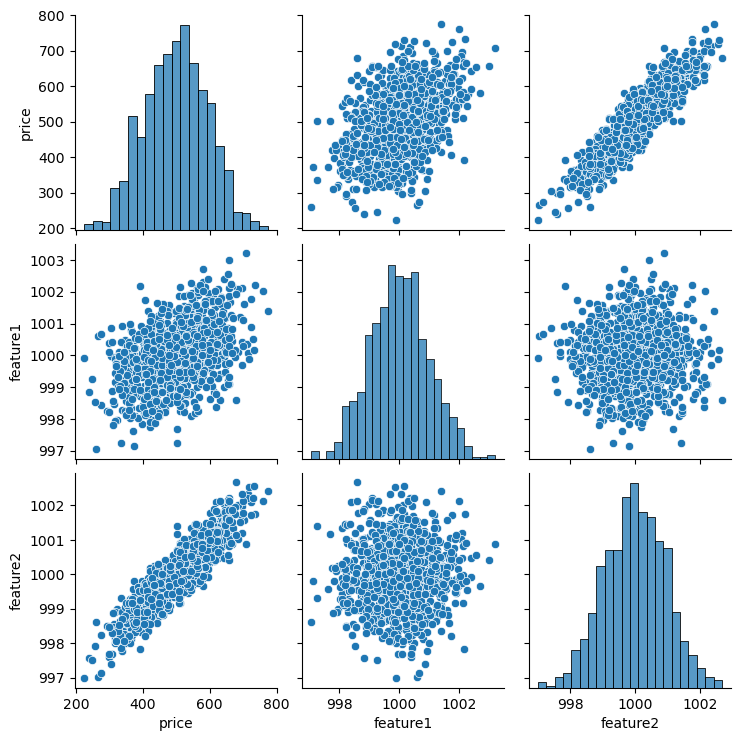

In [37]:
sns.pairplot(df)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df[['feature1', 'feature2']].values

In [40]:
y = df['price'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
X_train.shape

(700, 2)

In [43]:
X_test.shape

(300, 2)

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
# scaling data while dealing with neural networks
scaler = MinMaxScaler()

In [46]:
scaler.fit(X_train)

MinMaxScaler()

In [47]:
X_train = scaler.transform(X_train)

In [48]:
X_test = scaler.transform(X_test)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
# make a model by passing layers inside
# model = Sequential([Dense(4, activation='relu'), 
                   # Dense(2, activation='relu'),
                   # Dense(1)]) 

In [51]:
# another method of passing layer, this a better one for later editing
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# output layer
model.add(Dense(1))

model.compile('rmsprop', loss ='mse')

In [52]:
model.fit(x = X_train, y = y_train, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256768.1875
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256671.5000
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256595.8438
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256520.3438
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256440.8281
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256354.1875
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256259.5156
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256156.8438
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256044.3438
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255918.7031
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255781.4844
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

Epoch 193/250
22/22 [==============================] - 0s 2ms/step - loss: 309.1253
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 293.3532
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 279.0038
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 264.1976
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 250.4339
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 241.3121
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 228.0174
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 214.7478
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 202.5743
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 191.8015
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 180.8138
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 1

In [53]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

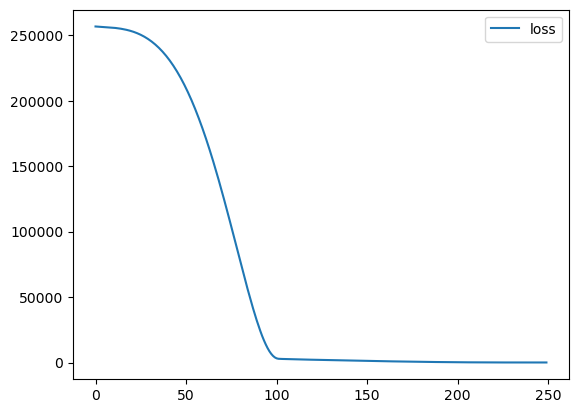

In [54]:
loss_df.plot()

In [55]:
# now lets do some model evaluation

model.evaluate(X_test,y_test,verbose=0)

25.056657791137695

In [56]:
model.evaluate(X_train,y_train,verbose=0)

24.037120819091797

In [57]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [58]:
test_predictions

array([[405.57532],
       [623.10126],
       [591.71533],
       [572.1461 ],
       [367.39014],
       [578.94183],
       [515.3239 ],
       [459.0736 ],
       [549.23486],
       [447.49582],
       [611.3777 ],
       [548.3987 ],
       [419.3671 ],
       [409.22763],
       [650.33716],
       [437.37766],
       [508.0984 ],
       [659.6802 ],
       [662.1478 ],
       [565.1486 ],
       [334.93378],
       [445.01074],
       [383.02393],
       [379.11276],
       [566.3713 ],
       [610.3855 ],
       [532.3085 ],
       [428.0374 ],
       [655.11334],
       [414.19733],
       [442.65973],
       [485.1477 ],
       [438.56348],
       [681.3801 ],
       [424.74448],
       [418.08304],
       [501.50867],
       [550.25024],
       [509.95016],
       [396.0176 ],
       [618.09064],
       [416.7718 ],
       [604.00903],
       [445.85645],
       [501.96112],
       [581.02545],
       [668.1236 ],
       [490.2665 ],
       [318.9894 ],
       [485.4818 ],


In [59]:
# making a panda series instead of numpy array
test_predictions = pd.Series(test_predictions.reshape(300,))

In [60]:
test_predictions

0      405.575317
1      623.101257
2      591.715332
3      572.146118
4      367.390137
          ...    
295    529.080566
296    515.403687
297    609.218628
298    417.032928
299    411.280640
Length: 300, dtype: float32

In [61]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [62]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [65]:
pred_df.columns = ['Test True Y','Model Predictions']

In [66]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.575317
1,624.156198,623.101257
2,582.455066,591.715332
3,578.588606,572.146118
4,371.224104,367.390137
...,...,...
295,525.704657,529.080566
296,502.909473,515.403687
297,612.727910,609.218628
298,417.569725,417.032928


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

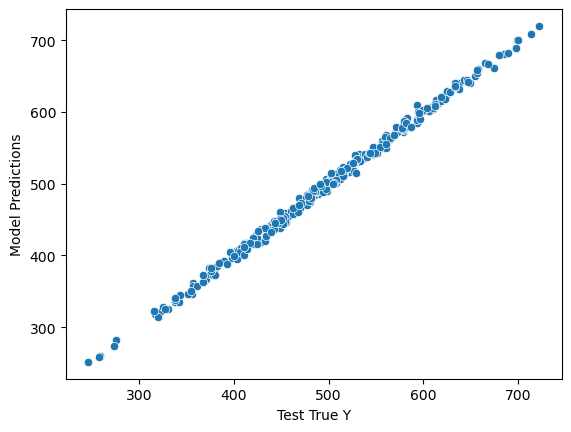

In [67]:
sns.scatterplot(x='Test True Y', y = 'Model Predictions', data=pred_df)

In [ ]:
# the regression model is performing very well as visible from plot above

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [72]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.028907162321133

In [74]:
# right now on average we are 4 dollars off from the price point
# it depends on the original data how good the error is
df.describe()
# the mean price is 498.67 dollars, so our error is less than 1 %
# therefore the model is performing very well in predicting price
# the errors can always be compared with the distribution of the data

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [85]:
mse = mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])
# for root mean squared error just do
rmse = mse ** 0.5
print('Mean Squared Error: ' + str(mse))
print('Root Mean Squared Error: ' + str(rmse))


Mean Squared Error: 25.05665950150643
Root Mean Squared Error: 5.005662743484266


In [86]:
# predicting on brand new data
new_gem = [[998,1000]] # made up features

In [88]:
# now checking what should be the price
new_gem = scaler.transform(new_gem)

In [90]:
model.predict(new_gem)

1/1 [==============================] - 1s 1s/step


array([[420.2588]], dtype=float32)

In [91]:
# the price according to the features will now be 420.2588 dollars

In [92]:
from tensorflow.keras.models import load_model

In [94]:
# saving the keras model
model.save('my_gem_model.h5')

In [95]:
# loading the model
later_model = load_model('my_gem_model.h5')

In [96]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 62ms/step


array([[420.2588]], dtype=float32)

In [97]:
# notice we got the same results as we reloaded the model

### And now we come to the end of this basics project